In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# COVID-19 - openDataSUS
Estudo sobre a incidência de COVID-19 em comparação com outras doenças respiratórias, de causa viral ou bacteriológica.
## HIPOTESE
Casos de Morte por COVID-19 foram SUPERNOTIFICADOS, tendo em vista que diversos governos estaduais emitiram diretrizes que indicavam a priorização dos óbitos como casos de COVID-19, antes de um exame detalhado da vítima.
## TEORIA
Mortes por outras doenças respiratórias foram suprimidas e notificadas como Causa Básica do Óbito por COVID-19.

## Sistema de Informação sobre Mortalidade – SIM (2009 a 2021)

No primeiro passo, vamos carregar os dados de cada óbito obtidos do SIM (Sistema de Informação sobre Mortalidade) entre os anos de 2009 a 2021.
As colunas mais importantes, para o nosso estudo, são:
- DTOBITO (Data do Óbito);
- SEXO;
- IDADE;
- CAUSABAS (Causa Base do Óbito)

In [3]:
# https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2009.csv
# ...
# https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2019.csv
# https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv
# https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv

cols_list = ['DTOBITO', 'SEXO', 'IDADE', 'CAUSABAS']
df_tratado = pd.DataFrame(columns=cols_list)

for ano in range(2009, 2020):
    url = f'https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_{ano}.csv'
    print(f"Baixando dados de {url}")
    df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)

print(f"Baixando dados de https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv")
df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
print(f"Baixando dados de https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv")
df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)

df_tratado.head()

Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2009.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=c

Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2010.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2011.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2012.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2013.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2014.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2015.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2016.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2017.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2018.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2019.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


Baixando dados de https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv


/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:18: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
/var/folders/nv/lqyc8nv104gff5kns5mk9gcm0000gp/T/ipykernel_24804/83083126.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)


,DTOBITO,SEXO,IDADE,CAUSABAS
0,28102009,2,443,I228
1,6062009,2,201,R99
2,9022009,1,425,W747
3,4022009,1,467,C80
4,8032009,1,441,I219


Para obtermos o ano do óbito (que será usado adiante para catalogar os dados), criamos uma nova coluna "ANO" que conterá os dados de ano da coluna "DTOBITO", cujo formato é 'dMMyyyy'. Ou seja, o ano corresponde aos 4 últimos números do dado.

In [4]:
df_tratado['ANO'] = df_tratado['DTOBITO'].map(lambda x: int(re.findall(r'\d{4}$', str(x))[0]))

df_tratado.head()

,DTOBITO,SEXO,IDADE,CAUSABAS,ANO
0,28102009,2,443,I228,2009
1,6062009,2,201,R99,2009
2,9022009,1,425,W747,2009
3,4022009,1,467,C80,2009
4,8032009,1,441,I219,2009


## CASOS DE COVID-19

Segundo o documento anexo "Orientações para o preenchimento da Declaração de Óbito - COVID-19",,,,,,,,, o Governo do Estado de São Paulo (seguindo as orientações determinadas pelo Ministério da Saúde), orienta seus médicos a preencherem a Causa Básica do Óbito (campo CAUSABAS) com a sigla **B34.2**, sendo que, no conjunto de dados do SIM, estaria o óbito registrado como **B342**.

Com esses dados em mãos, isolamos os casos cuja causas do óbito foram:
- **B34.2** - Infecção por Coronavírus de localização não especificada
- **U04.9** - Síndrome Respiratória Aguda Grave - SARS
- **U07.1** - Código não habilitado no SIM

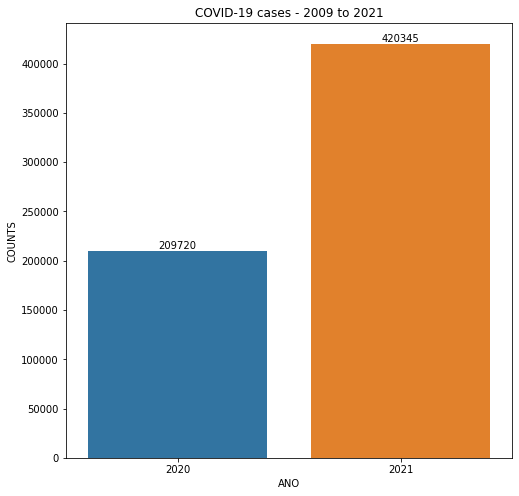

In [5]:
codes = ['B342', 'U049', 'U071']
df_covid = df_tratado[df_tratado['CAUSABAS'].isin(codes)]
covid_por_ano = df_covid.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(8,8))
plt.title('COVID-19 cases - 2009 to 2021')
#plt.xticks(rotation=90)
ax = sns.barplot(x='ANO', y='COUNTS', data=covid_por_ano[covid_por_ano['ANO'].isin([2020, 2021])])
ax.bar_label(ax.containers[0])
plt.show()

## CASOS DE DENGUE

Agora, vamos comparar os resultados obtidos com o número de casos de **Dengue, Chikungunya, Zica, Febre Amarela** e outras doenças transmitidas por mosquitos.  

Códigos para doenças transmitidas por mosquitos:
- A90 - Dengue [dengue clássico]
- A91 - Febre hemorrágica devida ao vírus do dengue
- A92 -	Outras febres virais transmitidas por mosquitos
- A920 - Febre de Chikungunya
- A921 - Febre de Onyong-nyong
- A922 - Febre eqüina venezuelana
- A923 - Infecção pelo vírus West Nile
- A924 - Febre do vale do Rift
- A928 - Outras febres virais especificadas transmitidas por mosquitos
- A929 - Febre viral transmitida por mosquitos, não especificada
- A93 - Outras febres por vírus transmitidas por artrópodes não classificadas em outra parte
- A930 - Febre de Oropouche
- A931 - Febre por flebótomos
- A932 - Febre do Colorado transmitida por carrapatos
- A938 - Outras febres virais especificadas transmitidas por artrópodes
- A94 - Febre viral transmitida por artrópodes, não especificada
- A95 - Febre amarela
- A950 - Febre amarela silvestre
- A951 - Febre amarela urbana
- A959 - Febre amarela não especificada
- A96 - Febre hemorrágica por arenavírus
- A960 - Febre hemorrágica de Junin
- A961 - Febre hemorrágica de Machupo
- A962 - Febre de Lassa
- A968 - Outras febres hemorrágicas por arenavírus
- A969 - Febre hemorrágica por arenavírus, não especificada
- A98 - Outras febres hemorrágicas por vírus, não classificadas em outra parte
- A980 - Febre hemorrágica da Criméia (do Congo)
- A981 - Febre hemorrágica de Omsk
- A982 - Doença da floresta de Kyasanur
- A983 - Doença de Marburg
- A984 - Doença pelo vírus Ebola
- A985 - Febre hemorrágica com síndrome renal
- A988 - Outras febres hemorrágicas especificadas por vírus
- A99 - Febres hemorrágicas virais não especificadas

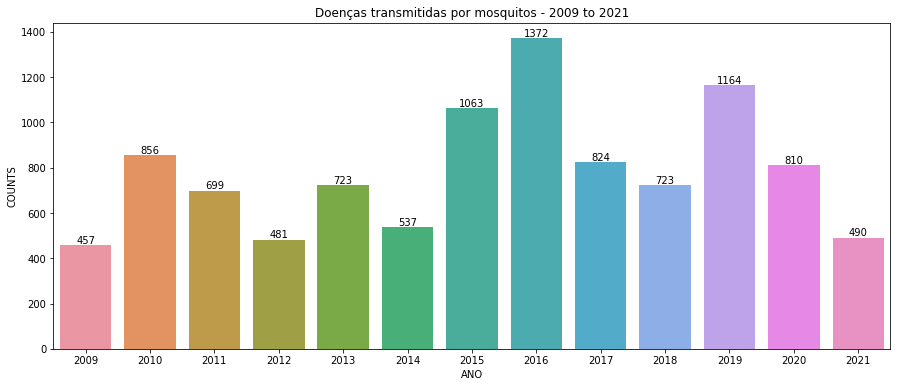

In [6]:
den_codes = [
    'A90', 
    'A91', 
    'A92',
    'A920',
    'A921',
    'A922',
    'A923',
    'A924',
    'A928',
    'A929',
    'A93',
    'A930',
    'A931',
    'A932',
    'A938',
    'A94',
    'A95',
    'A950',
    'A951',
    'A959',
    'A96',
    'A960',
    'A961',
    'A962',
    'A968',
    'A969',
    'A98',
    'A980',
    'A981',
    'A982',
    'A983',
    'A984',
    'A985',
    'A988',
    'A99',
]
df_dengue = df_tratado[df_tratado['CAUSABAS'].isin(den_codes)]
dengue_por_ano = df_dengue.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('Doenças transmitidas por mosquitos - 2009 to 2021')
#plt.xticks(rotation=90)
ax = sns.barplot(x='ANO', y='COUNTS', data=dengue_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=dengue_por_ano['COUNTS'])
plt.show()


## CASOS DE TUBERCULOSE

Agora, vamos comparar os resultados obtidos com o número de casos de **Tuberculose**.

Códigos para Tuberculose:
- A15 - Tuberculose respiratória, com confirmação bacteriológica e histológica
- A16 - Tuberculose das vias respiratórias, sem confirmação bacteriológica ou histológica
- A16.0 - Tuberculose pulmonar com exames bacteriológico e histológico negativos
- A16.1 - Tuberculose pulmonar, sem realização de exame bacteriológico ou histológico
- A16.2 - Tuberculose pulmonar, sem menção de confirmação bacteriológica ou histológica
- A16.3 - Tuberculose dos gânglios intratorácicos, sem menção de confirmação bacteriológica ou histológica
- A16.4 - Tuberculose da laringe, da traquéia e dos brônquios, sem menção de confirmação bacteriológica ou histológica
- A16.5 - Pleurisia tuberculosa, sem menção de confirmação bacteriológica ou histológica
- A16.7 - Tuberculosa respiratória primária sem menção de confirmação bacteriológica ou histológica
- A16.8 - Outras formas de tuberculose das vias respiratórias, sem menção de confirmação bacteriológica ou histológica
- A16.9
- A17 - Tuberculose do sistema nervoso
- A18 - Tuberculose de outros órgãos
- A19 - Tuberculose miliar
- B90 - Sequelas de tuberculose
- J65 - Pneumoconiose associada com tuberculose

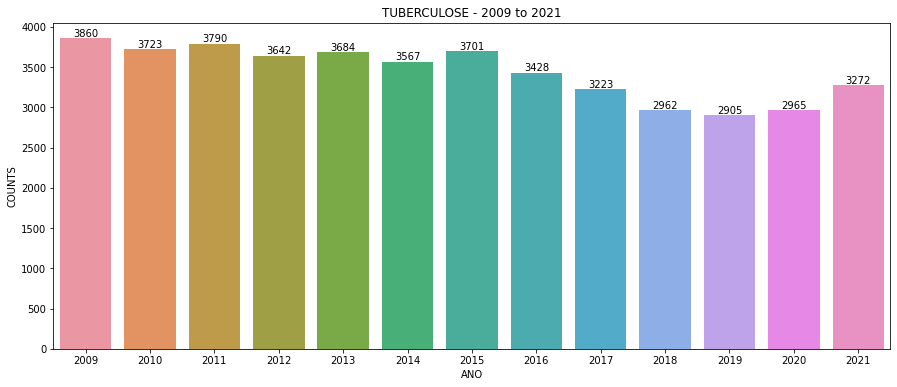

In [7]:
tub_codes = [
    'A15', 
    'A16',
    'A160', 
    'A161',
    'A162',
    'A163',
    'A164',
    'A165',
    'A167',
    'A169',
    'A17', 
    'A18', 
    'A19', 
    'B90', 
    'J65']
df_tuberculose = df_tratado[df_tratado['CAUSABAS'].isin(tub_codes)]
tuberculose_por_ano = df_tuberculose.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('TUBERCULOSE - 2009 to 2021')
ax = sns.barplot(x='ANO', y='COUNTS', data=tuberculose_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=tuberculose_por_ano['COUNTS'])
plt.show()

Perceba que, em 2020 e 2021, houve um leve aumento dos casos de Tubercose em relação a 2019, mas uma queda em relação à série histórica.

## CASOS DE PNEUMONIA

Agora, vamos comparar os resultados obtidos com o número de casos de **Pneumonia**.

Códigos para Pneumonia:
- A40.3 - Septicemia por Streptococcus pneumonia
- B05.2 - Sarampo complicado por pneumonia
- B20.6 - Doença pelo HIV resultando em pneumonia por Pneumocystis jirovecii
- B95.3 - Streptococcus pneumoniae, como causa de doenças classificadas em outros capítulos
- B96.0 - Mycoplasma pneumoniae (M. pneumoniae), como causa de doenças classificadas em outros capítulos
- B96.1 - Klebsiella pneumoniae (M. pneumoniae), como causa de doenças classificadas em outros capítulos
- J10.0 - Influenza com pneumonia devida a outro vírus da influenza (gripe) identificado
- J11.0 - Influenza (gripe) com pneumonia, devida a vírus não identificado
- J12 - Pneumonia viral não classificada em outra parte
- J12.0 - Pneumonia devida a adenovírus
- J12.1 - Pneumonia devida a vírus respiratório sincicial
- J12.2 - Pneumonia devida à parainfluenza
- J12.8 - Outras pneumonias virais
- J12.9 - Pneumonia viral não especificada
- J13 - Pneumonia devida a Streptococcus pneumoniae
- J14 - Pneumonia devida a Haemophilus infuenzae
- J15 - Pneumonia bacteriana não classificada em outra parte
- J15.0 - Pneumonia devida à Klebsiella pneumoniae
- J15.1 - Pneumonia devida a Pseudomonas
- J15.2 - Pneumonia devida a Staphylococcus
- J15.3 - Pneumonia devida a Streptococcus do grupo B
- J15.4 - Pneumonia devida a outros estreptococos
- J15.5 - Pneumonia devida a Escherichia coli
- J15.6 - Pneumonia devida a outras bactérias aeróbicas gram-negativas
- J15.7 - Pneumonia devida a Mycoplasma pneumoniae
- J15.8 - Outras pneumonias bacterianas
- J15.9 - Pneumonia bacteriana não especificada
- J16 - Pneumonia devida a outros microorganismos infecciosos especificados não classificados em outra parte
- J16.0 - Pneumonia devida a clamídias
- J16.8 - Pneumonia devida a outros microorganismos infecciosos especificados
- J17 - Pneumonia em doenças classificadas em outra parte
- J17.0 - Pneumonia em doenças bacterianas classificadas em outra parte
- J17.1 - Pneumonia em doenças virais classificadas em outra parte
- J17.2 - Pneumonia em micoses classificadas em outra parte
- J17.3 - Pneumonia em doenças parasitárias classificadas em outra parte
- J17.8 - Pneumonia em outras doenças classificadas em outra parte
- J18 - Pneumonia por microorganismo não especificada
- J18.0 - Broncopneumonia não especificada
- J18.1 - Pneumonia lobar não especificada
- J18.2 - Pneumonia hipostática não especificada
- J18.8 - Outras pneumonias devidas a microorganismos não especificados
- J18.9 - Pneumonia não especificada
- J20.0 - Bronquite aguda devida a Mycoplasma pneumoniae
- J85.1 - Abscesso do pulmão com pneumonia
- J85.2 - Abscesso do pulmão sem pneumonia
- P23 - Pneumonia congênita
- P23.0 - Pneumonia congênita devida a agente viral
- P23.1 - Pneumonia congênita devida a Clamídia
- P23.2 - Pneumonia congênita devida a estafilococo
- P23.3 - Pneumonia congênita devida a estreptococo do grupo B
- P23.4 - Pneumonia congênita devida a Escherichia coli
- P23.5 - Pneumonia congênita devida a Pseudomonas
- P23.6 - Pneumonia congênita devida a outros agentes bacterianos
- P23.8 - Pneumonia congênita devida a outros organismos
- P23.9 - Pneumonia congênita não especificada

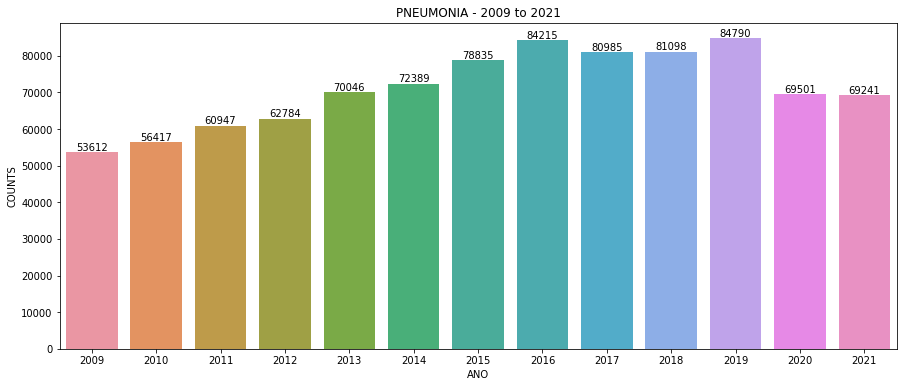

In [8]:
pne_codes = [
    "A403",
    "B052",
    "B206",
    "B953",
    "B960",
    "B961",
    "J100",
    "J110",
    "J12",
    "J120",
    "J121",
    "J122",
    "J128",
    "J129",
    "J13",
    "J14",
    "J15",
    "J150",
    "J151",
    "J152",
    "J153",
    "J154",
    "J155",
    "J156",
    "J157",
    "J158",
    "J159",
    "J16",
    "trap",
    "J160",
    "J168",
    "J17",
    "J170",
    "J171",
    "J172",
    "J173",
    "J178",
    "J18",
    "J180",
    "J181",
    "J182",
    "J188",
    "J189",
    "J200",
    "J851",
    "J852",
    "P23",
    "P230",
    "P231",
    "P232",
    "P233",
    "P234",
    "P235",
    "P236",
    "P238",
    "P239"
]
df_pneumonia = df_tratado[df_tratado['CAUSABAS'].isin(pne_codes)]
pneumonia_por_ano = df_pneumonia.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('PNEUMONIA - 2009 to 2021')
ax = sns.barplot(x='ANO', y='COUNTS', data=pneumonia_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=pneumonia_por_ano['COUNTS'])
plt.show()

Perceba que, em 2020 e 2021, há uma redução de cerca de 18% entre os mortos em 2019 quanto aos mortos em 2020 e 2021.   
Esta diferença é quase nula quando se trata dos números de 2020 e 2021 (69501 e 69241, respectivamente).

## CASOS DE DOENÇAS CARDÍACAS

Também iremos comparar os resultados obtidos com o número de casos de **Doenças Cardíacas**.

Códigos para Doenças Cardíacas:
- I51  - Complicações de cardiopatias e doenças cardíacas mal definidas
- I510 - Defeito adquirido de septo cardíaco
- I511 - Ruptura de cordoalha tendínea, não classificada em outra parte
- I512 - Ruptura de músculo papilar, não classificada em outra parte
- I513 - Trombose intracardíaca, não classificada em outra parte
- I514 - Miocardite não especificada
- I515 - Degeneração miocárdica
- I516 - Doença cardiovascular não especificada
- I517 - Cardiomegalia
- I518 - Outras doenças mal definidas do coração
- I519 - Doença não especificada do coração

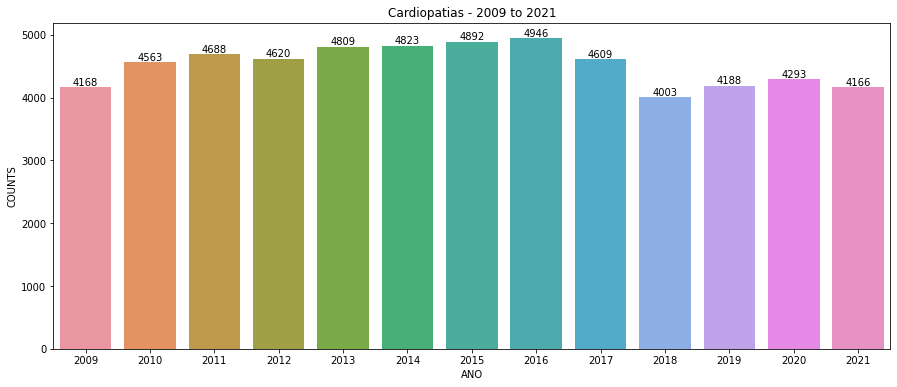

In [10]:
card_codes = [
    "I51", 
    "I510",
    "I511",
    "I512",
    "I513",
    "I514",
    "I515",
    "I516",
    "I517",
    "I518",
    "I519"
]
df_cardio = df_tratado[df_tratado['CAUSABAS'].isin(card_codes)]
cardio_por_ano = df_cardio.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('Cardiopatias - 2009 to 2021')
ax = sns.barplot(x='ANO', y='COUNTS', data=cardio_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=pneumonia_por_ano['COUNTS'])
plt.show()

Podemos notar que houve uma queda em 2018 de casos de morte por cardiopatia, mas uma retomada gradual nos anos seguintes, mantendo a média.

**CONTINUA**